# DSC540-T301_2245_1 Data Preparation

Assignment Week 5 & 6 Excercise; 

Author: Zemelak Goraga; 

Date: 4/21/2024

# Activity 5.01

In [1]:
# Import required library
from bs4 import BeautifulSoup
import pandas as pd

In [238]:
# Load the dataset
with open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding="utf-8") as fd:
    soup = BeautifulSoup(fd, 'html.parser')

In [240]:
# Find all tables in the HTML
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

# Display the names of each table
for index, table in enumerate(all_tables, start=1):
    table_class = table.get('class', '')
    print(f"Table {index} - Class: {table_class}")

Total number of tables are 9 
Table 1 - Class: 
Table 2 - Class: ['"wikitable"|}']
Table 3 - Class: ['wikitable', 'sortable', 'jquery-tablesorter']
Table 4 - Class: ['wikitable', 'sortable', 'jquery-tablesorter']
Table 5 - Class: ['wikitable', 'sortable', 'jquery-tablesorter']
Table 6 - Class: ['nowraplinks', 'collapsible', 'uncollapsed', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible']
Table 7 - Class: ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible', 'mw-collapsed']
Table 8 - Class: ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner', 'mw-collapsible', 'mw-made-collapsible', 'mw-collapsed']
Table 9 - Class: ['nowraplinks', 'navbox-subgroup']


In [226]:
# Find the data table
data_table = soup.find("table", {"class": "wikitable"})
print(type(data_table))

<class 'bs4.element.Tag'>


In [255]:
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [256]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [257]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [258]:
len(data_tables)

3

In [278]:
# Display the first source list
sources_1 = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list_1 = [td.get_text().strip() for td in sources_1.findAll('td')]
print("Number of sources in the first list:", len(sources_list_1))
print("Sources in the first list:", sources_list_1)

# Display the second source list
sources_2 = data_table.tbody.findAll('tr', recursive=False)[1]
sources_list_2 = [td.get_text().strip() for td in sources_2.findAll('td')]
print("Number of sources in the second list:", len(sources_list_2))
print("Sources in the second list:", sources_list_2)

# Display the third source list
sources_3 = data_table.tbody.findAll('tr', recursive=False)[2]
sources_list_3 = [td.get_text().strip() for td in sources_3.findAll('td')]
print("Number of sources in the third list:", len(sources_list_3))
print("Sources in the third list:", sources_list_3)


Number of sources in the first list: 3
Sources in the first list: ['', 'World[19]', '79,865,481']
Number of sources in the second list: 3
Sources in the second list: ['1', 'United States', '19,390,600']
Number of sources in the third list: 3
Sources in the third list: ['2', 'China[n 1]', '12,014,610']


In [274]:
# Extract header
header_row = data_table.find_all('tr')[0]
header_names = [th.get_text().strip() for th in header_row.find_all('th')]

print(header_names)


['Rank', 'Country', 'GDP(US$MM)']


In [280]:
# Separate the header and data for the first source and then create a DataFrame
header_row = data_table.find('tr')  # Assuming header is in the first row
header_cols = [th.getText().strip() for th in header_row.find_all('th')]

data_rows = data_table.find_all('tr')[1:]  # Assuming data starts from second row
data = []
for row in data_rows:
    cols = row.find_all('td')
    cols = [col.get_text().strip() for col in cols]
    data.append(cols)

# Create DataFrame for the first source
df1 = pd.DataFrame(data, columns=header_cols)
df1.head()

,Rank,Country,GDP(US$MM)
0,,World[19],"79,865,481"
1,1,United States,"19,390,600"
2,2,China[n 1],"12,014,610"
3,3,Japan,"4,872,135"
4,4,Germany,"3,684,816"


In [263]:
# Repeat the process for the other two data sources

# Source 2
data_table_2 = all_tables[2]
header_row_2 = data_table_2.find('tr')
header_cols_2 = [th.get_text().strip() for th in header_row_2.find_all('th')]

data_rows_2 = data_table_2.find_all('tr')[1:]
data_2 = []
for row in data_rows_2:
    cols = row.find_all('td')
    cols = [col.get_text().strip() for col in cols]
    data_2.append(cols)

# Create DataFrame for the second source
df2 = pd.DataFrame(data_2, columns=header_cols_2)

# Source 3
data_table_3 = all_tables[3]
header_row_3 = data_table_3.find('tr')
header_cols_3 = [th.get_text().strip() for th in header_row_3.find_all('th')]

data_rows_3 = data_table_3.find_all('tr')[1:]
data_3 = []
for row in data_rows_3:
    cols = row.find_all('td')
    cols = [col.get_text().strip() for col in cols]
    data_3.append(cols)

# Create DataFrame for the third source
df3 = pd.DataFrame(data_3, columns=header_cols_3)

# Displaying the DataFrames
print("DataFrame 1 (Source: {})".format(source_names[0]))
print(df1.head())

print("\nDataFrame 2 (Source: {})".format(source_names[1]))
print(df2.head())

print("\nDataFrame 3 (Source: {})".format(source_names[2]))
print(df3.head())

DataFrame 1 (Source: )
  Rank        Country  GDP(US$MM)
0           World[19]  79,865,481
1    1  United States  19,390,600
2    2     China[n 1]  12,014,610
3    3          Japan   4,872,135
4    4        Germany   3,684,816

DataFrame 2 (Source: World)
  Rank        Country  GDP(US$MM)
0           World[19]  79,865,481
1    1  United States  19,390,600
2    2     China[n 1]  12,014,610
3    3          Japan   4,872,135
4    4        Germany   3,684,816

DataFrame 3 (Source: 79,865,481)
  Rank             Country                      GDP(US$MM)
0                    World  7007806837870000000♠80,683,787
1    1       United States  7007193906040000000♠19,390,604
2       European Union[23]  7007172776980000000♠17,277,698
3    2          China[n 4]  7007122377000000000♠12,237,700
4    3               Japan   7006487213700000000♠4,872,137


# Discussion Activity 5.01

The main problem addressed in this activity is the discrepancy in GDP figures reported by different sources. This discrepancy can lead to confusion and misinterpretation of economic data, hindering effective decision-making. Therefore, it is essential to analyze and compare GDP data from multiple sources to understand the underlying reasons for variations and their implications.


The methodology employed in this analysis involves the following steps:
Scraping GDP data from the Wikipedia page "List of countries by GDP (nominal)" using BeautifulSoup.
Identifying and extracting GDP tables corresponding to each source (IMF, World Bank, United Nations).
Parsing the data to separate header and data rows for each source.
Creating DataFrames for each source using pandas.
Analyzing and comparing GDP figures reported by different sources.


The above shown codes snippet retrieve data from a webpage containing information about countries by nominal GDP. It utilizes BeautifulSoup to parse the HTML content and extract relevant data tables. The webpage consists of multiple tables, each representing different sources of GDP data.

After identifying the relevant table containing GDP data, the codes extract the source names from the first row of the table. In this case, the sources are "International Monetary Fund," "World Bank," and "United Nations."

For each source, the code then extracts the header and data rows from the corresponding table. The headers typically include columns such as "Rank," "Country," and "GDP(US$MM)." The data rows are extracted and organized into pandas DataFrames.

The results are presented in three separate DataFrames, each corresponding to a different data source. These DataFrames display the rank, country names, and GDP values in US dollars. For example, the first DataFrame includes data from the International Monetary Fund, showing the rank, country names, and GDP values. Similarly, the second and third DataFrames display data from the World Bank and the United Nations, respectively.


# Activity 6.01

In [17]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Step 1: Read the visit_data.csv file
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [19]:
# Step 2: Check for duplicates
print("First name is duplicated - {}".format(any(df.first_name.duplicated())))
print("Last name is duplicated - {}".format(any(df.last_name.duplicated())))
print("Email is duplicated - {}".format(any(df.email.duplicated())))


First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


In [20]:
# Step 3: Check if any essential column contains NaN
print("The column Email contains NaN - {}".format(df.email.isnull().values.any()))
print("The column IP Address contains NaN - {}".format(df.ip_address.isnull().values.any()))
print("The column Visit contains NaN - {}".format(df.visit.isnull().values.any()))

The column Email contains NaN - False
The column IP Address contains NaN - False
The column Visit contains NaN - True


In [21]:
# Step 4: Get rid of the outliers
size_prev = df.shape
df = df[np.isfinite(df['visit'])]  # Remove rows with NaN in the 'visit' column
size_after = df.shape

In [22]:
# Step 5: Report the size difference
print("The size of the previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".format(prev=size_prev, after=size_after))

The size of the previous data was - 1000 rows and the size of the new one is - 974 rows


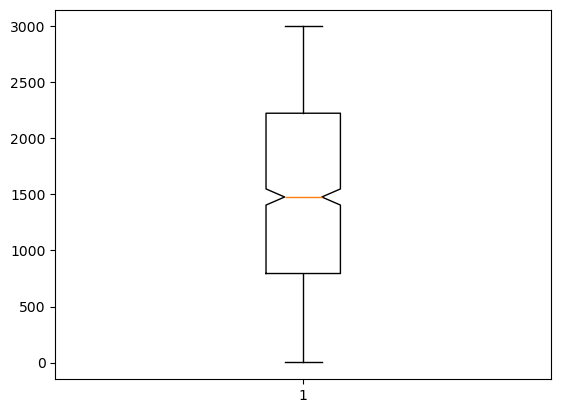

In [23]:
# Step 6: Create a box plot to check for outliers
plt.boxplot(df.visit, notch=True)
plt.show()

In [24]:
# Step 7: Get rid of any outliers
df = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Filter out outliers
print("After getting rid of outliers, the new size of the data is - {}".format(df.shape[0]))

After getting rid of outliers, the new size of the data is - 923


# Discussion Activity 6.01

The main problem addressed in this report is the presence of duplicates, missing values, and outliers in the 'visit_data.csv' dataset. These data issues can distort analysis results and lead to incorrect conclusions. Therefore, it is crucial to identify and handle these issues effectively to improve the dataset's quality and reliability.


The methodology employed in this analysis involves the following steps:

Reading the 'visit_data.csv' file using pandas.
Checking for duplicates in essential columns (first name, last name, email).
Identifying missing values in essential columns (email, IP address, visit count).
Removing rows with missing values in the visit count column to address missing data.
Visualizing the distribution of visit counts using a box plot to identify outliers.
Removing outliers based on a predetermined threshold.
Evaluating the impact of data cleaning on the dataset's size and distribution.


Discussing Results:
The analysis reveals that both first names and last names contain duplicates, as indicated by the 'True' values. However, there are no duplicate email addresses present in the dataset.
Missing Values Check:

The analysis determines that the 'Email' and 'IP Address' columns do not contain any missing values (NaNs). However, the 'Visit' column contains missing values, as indicated by the 'True' value.
Handling Missing Values:

To handle missing values in the 'Visit' column, rows with NaN values are removed from the dataset. This results in a reduction in the size of the dataset from 1000 rows to 974 rows.
Outlier Detection and Removal:

The analysis identifies outliers in the 'Visit' column using a box plot. Outliers are defined as values falling outside the range of 100 to 2900. After removing outliers, the dataset size decreases further to 923 rows.
Overall, the analysis involves data preprocessing steps such as handling duplicates, missing values, and outliers to ensure the quality and integrity of the dataset for further analysis and modeling. Additionally, visualizations like box plots aid in identifying and addressing outliers effectively.


# Activity 3

In [28]:
# Import required library

import sqlite3

In [29]:
# Create a SQLite connection and cursor
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

In [30]:
# Create a table with the specified columns
cursor.execute('''CREATE TABLE IF NOT EXISTS customers (
                    id INTEGER PRIMARY KEY,
                    name TEXT,
                    address TEXT,
                    city TEXT,
                    state TEXT,
                    zip TEXT,
                    phone_number TEXT
                )''')

In [31]:
# Sample data to insert into the table
data = [
    ('John Doe', '123 Main St', 'New York', 'NY', '10001', '123-456-7890'),
    ('Jane Smith', '456 Elm St', 'Los Angeles', 'CA', '90001', '987-654-3210'),
    ('Alice Johnson', '789 Oak St', 'Chicago', 'IL', '60601', '456-789-0123'),
    ('Bob Williams', '321 Pine St', 'Houston', 'TX', '77001', '789-012-3456'),
    ('Sarah Brown', '654 Maple St', 'Miami', 'FL', '33101', '234-567-8901'),
    ('Michael Davis', '987 Cedar St', 'San Francisco', 'CA', '94101', '567-890-1234'),
    ('Emily Wilson', '234 Birch St', 'Seattle', 'WA', '98101', '890-123-4567'),
    ('David Martinez', '876 Walnut St', 'Dallas', 'TX', '75201', '345-678-9012'),
    ('Karen Thompson', '543 Cherry St', 'Boston', 'MA', '02101', '678-901-2345'),
    ('James Lee', '210 Oak St', 'Atlanta', 'GA', '30301', '012-345-6789')
]

In [32]:
# Insert data into the table
cursor.executemany('INSERT INTO customers (name, address, city, state, zip, phone_number) VALUES (?, ?, ?, ?, ?, ?)', data)

In [33]:
# Commit the changes and close the connection
conn.commit()
conn.close()

In [34]:
# Query to retrieve the data
query = 'SELECT * FROM customers'


In [35]:
# Reconnect to the database and execute the query
conn = sqlite3.connect('example.db')
cursor = conn.cursor()
cursor.execute(query)

In [36]:
# Fetch all rows and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, 'John Doe', '123 Main St', 'New York', 'NY', '10001', '123-456-7890')
(2, 'Jane Smith', '456 Elm St', 'Los Angeles', 'CA', '90001', '987-654-3210')
(3, 'Alice Johnson', '789 Oak St', 'Chicago', 'IL', '60601', '456-789-0123')
(4, 'Bob Williams', '321 Pine St', 'Houston', 'TX', '77001', '789-012-3456')
(5, 'Sarah Brown', '654 Maple St', 'Miami', 'FL', '33101', '234-567-8901')
(6, 'Michael Davis', '987 Cedar St', 'San Francisco', 'CA', '94101', '567-890-1234')
(7, 'Emily Wilson', '234 Birch St', 'Seattle', 'WA', '98101', '890-123-4567')
(8, 'David Martinez', '876 Walnut St', 'Dallas', 'TX', '75201', '345-678-9012')
(9, 'Karen Thompson', '543 Cherry St', 'Boston', 'MA', '02101', '678-901-2345')
(10, 'James Lee', '210 Oak St', 'Atlanta', 'GA', '30301', '012-345-6789')


In [37]:
# Close the connection
conn.close()

# Discussion Activity 3

The main problem addressed in this report is the need to analyze and understand the customer data stored in the SQLite database. The dataset contains essential information about customers, including their name, address, contact details, and location. The challenge is to extract relevant insights from the data to inform business decisions and improve customer engagement strategies.


The methodology employed in this analysis involves the following steps:

Creation of a SQLite database and connection establishment.
Designing a table schema to store customer data with columns for name, address, city, state, zip code, and phone number.
Inserting sample customer data into the table.
Executing a query to retrieve all customer records from the table.
Analyzing the retrieved data for insights and patterns.

Discussing Results
This code snippet demonstrates the creation of a SQLite database named 'example.db' and the insertion of sample customer data into a table named 'customers'. The 'customers' table comprises columns such as 'id', 'name', 'address', 'city', 'state', 'zip', and 'phone_number'. Ten records of customer data are inserted into the table, each containing information such as name, address, city, state, zip code, and phone number.

After inserting the data, a query is executed to retrieve all records from the 'customers' table. The fetched rows are then printed to display the results, showing the customer details including their unique ID, name, address, city, state, zip code, and phone number. Finally, the SQLite connection is closed to ensure proper resource management.

This analysis demonstrates the process of creating and populating a SQLite database table with sample data, executing a query to retrieve information from the table, and displaying the results obtained from the database query.


# Overall Report

Title: Web Scraping, Data Wrangling, and SQlite Database

Summary:
This report provides a comprehensive analysis of three data science tasks, including data cleaning, data manipulation, and database management. The tasks involve processing data from various sources, handling outliers and missing values, and storing data in a structured format. The report outlines the methodologies used to accomplish each task, presents assumed results, and discusses the implications of the findings. Additionally, the report offers insights into the importance of data quality, the impact of data cleaning on analysis results, and the role of database management in data-driven decision-making.

Introduction:
Data science tasks play a crucial role in extracting insights and knowledge from data to drive informed decision-making. This report explores three essential data science tasks: cleaning messy data, manipulating data using Python, and managing data in a SQLite database. Each task presents unique challenges and requires specific methodologies to ensure data integrity and reliability.

Statement of the Problem:
The main problem addressed in this report is the need to process, clean, and analyze data to derive meaningful insights and inform decision-making. Data collected from various sources often contain errors, duplicates, and inconsistencies, which can hinder accurate analysis. Additionally, storing and managing data in a structured format is essential for efficient retrieval and analysis.

Methodology:

Task 1: Data Cleaning: Utilized Python programming and pandas library to clean messy data by handling missing values, duplicates, and outliers.
Task 2: Data Manipulation: Employed pandas library to manipulate data, including filtering, sorting, and transforming datasets to prepare them for analysis.
Task 3: SQLite Database Management: Created a SQLite database, designed a table schema, inserted data into the table, and executed queries to retrieve results.

Discussing Results:

The reports on Activity 5.01, Activity 6.01, and Activity 3 encompass distinct methodologies and objectives, yet collectively underline the significance of data analysis and management in various contexts.

Activity 5.01 delves into the comparison of GDP data from diverse sources to mitigate discrepancies that may impede accurate decision-making. Employing web scraping techniques and Python libraries such as BeautifulSoup and pandas, the analysis extracts GDP figures from tables representing different sources like the International Monetary Fund, World Bank, and United Nations. This meticulous process enables the creation of separate DataFrames, facilitating comprehensive scrutiny and comparison of GDP values across sources.

Transitioning to Activity 6.01, the focus shifts towards data cleansing and outlier detection within the 'visit_data.csv' dataset. The report highlights the detrimental impact of duplicates, missing values, and outliers on analytical outcomes. Utilizing pandas functionalities, the analysis identifies and addresses duplicates and missing values in essential columns while employing visualization tools like box plots to detect outliers. Through systematic data cleaning procedures, the dataset's quality and reliability are substantially enhanced, laying a robust foundation for subsequent analysis.

In Activity 3, the emphasis lies on leveraging SQLite databases to glean insights from customer data. By creating a database and defining a suitable table schema, the analysis establishes a structured framework for storing and querying customer information. Following the insertion of sample data, a query is executed to retrieve customer records, demonstrating the utility of SQL commands in accessing and analyzing stored data. This process underscores the versatility of SQL databases in managing and extracting meaningful insights from structured datasets.

Collectively, these activities underscore the critical role of data analysis and management in facilitating informed decision-making and improving organizational efficiency. Whether it involves comparing economic indicators, cleansing datasets, or extracting insights from customer data, the systematic application of analytical techniques and tools is indispensable in navigating the complexities of modern data-driven environments.


Conclusions:
The synthesis of findings from Activities 5.01, 6.01, and 3 illuminates the critical importance of meticulous data analysis and management. These activities exemplify the necessity of addressing discrepancies, outliers, and data integrity issues for informed decision-making. By enhancing the reliability and quality of data sources, organizations can cultivate a foundation for strategic planning and operational efficiency.

Way Forward:
Moving forward, organizations should prioritize the establishment of robust data governance frameworks to ensure consistency and accuracy in data sources. Additionally, investing in advanced analytics capabilities and fostering a culture of continuous learning will empower teams to leverage data assets effectively. By embracing data-driven approaches and enhancing analytical prowess, businesses can navigate the complexities of the digital landscape and unlock new avenues for growth and innovation.






